In [ ]:
'''
Objective= Prediction of Graduate Admissions from an Indian perspective

Dataset= https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.
'''

'\nObjective= Prediction of Graduate Admissions from an Indian perspective\n\nDataset= https://www.kaggle.com/datasets/mohansacharya/graduate-admissions\nMohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019\nThis dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.\n'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [ ]:
data=pd.read_csv("Admission_Predict_Ver1.1.csv", index_col="Serial No.")

In [ ]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.shape

(500, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


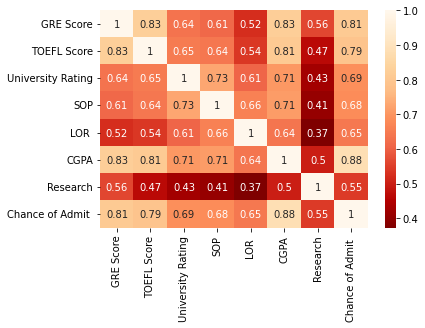

In [ ]:
sns.heatmap(data.corr(), cmap="OrRd_r", annot=True)

In [ ]:
y=data["Chance of Admit "]
X=data.drop("Chance of Admit ", axis=1)

In [ ]:
#With PCA we simplify the multydimensional in 2 dimension
pca= PCA(n_components=2)
pca.fit(X)
X_PCA=pca.transform(X)
X_PCA.shape

(500, 2)

In [ ]:
X_PCA=pd.DataFrame(X_PCA, columns=["PC1", "PC2"])
X_PCA.head()

,PC1,PC2
0,-23.273887,-0.783279
1,-6.811715,3.351076
2,1.841991,2.687708
3,-6.140811,-0.024660
4,4.212021,2.824404


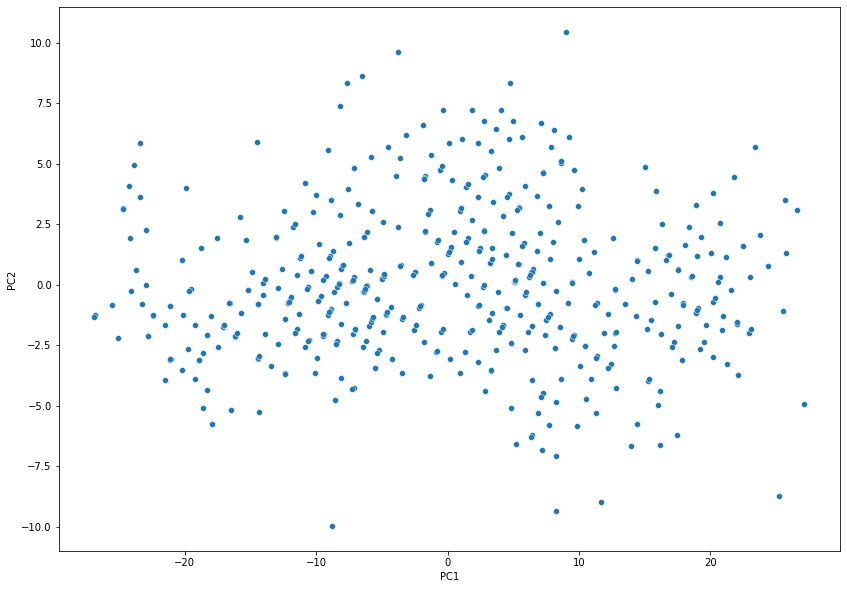

In [ ]:
plt.figure(figsize=(14,10))

plot=sns.scatterplot(data=X_PCA,x="PC1",y="PC2")
plot.set(xlabel='PC1', ylabel='PC2')
plt.show()

In [ ]:
#PC1 dominate the dataset
PCA_max=np.argmax(X_PCA["PC1"])
PCA_min=np.argmin(X_PCA["PC1"])
print(PCA_max,PCA_min)

377 202


In [ ]:
data.iloc[PCA_max, : ]

GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Chance of Admit        0.47
Name: 378, dtype: float64

In [ ]:
data.iloc[PCA_min, :]

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Chance of Admit        0.97
Name: 203, dtype: float64

In [ ]:
#Scale the data to reduce the spread between variables
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.8,shuffle=True)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_test,y_test)

0.8319328499669895

In [ ]:
pred=model.predict(X_test)

Text(0, 0.5, 'Actual value')

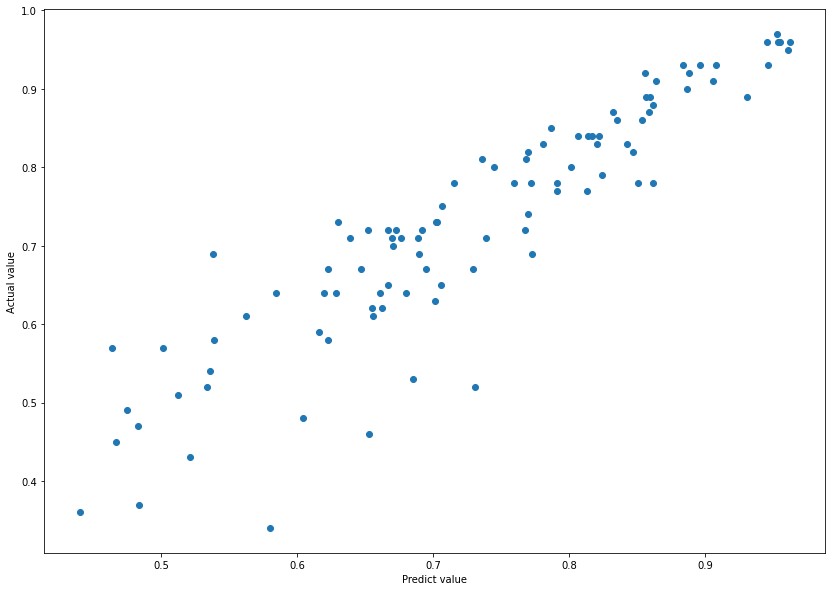

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(pred,y_test,"o")
plt.xlabel("Predict value")
plt.ylabel("Actual value")